**Nội dung buổi thực hành**:



1.   Thử nghiệm Word Embedding (WE) với thư viện gensim.
2.   Dùng WE để phân lớp văn bản với Logistic Regression.



**1) Thử nghiệm Word Embedding với thư viện gensim**

Trước tiên, chúng ta cần upgrade thư viện gensim. Có một vấn đề là, lần đầu tiên chạy trên một máy ảo mới được khởi động của Google Colab, gensim gặp lỗi. Chúng ta cần restart máy ảo ngay sau khi upgrade gensim để làm mất lỗi này.  

In [1]:
!pip install --upgrade gensim
!pip install --upgrade kagglehub
!pip install --upgrade scikit-learn

Chúng ta cần chọn một bộ WE để thử nghiệm. Có nhiều bộ WE đã được huấn luyện sẵn, chúng ta liệt kê bằng đoạn chương trình bên dưới. Sau đó, chúng ta sẽ download để sử dụng. Trong bài này, chúng ta download và sử dụng bộ "word2vec-google-news-300"

In [2]:
import gensim
import gensim.downloader

for weStr in gensim.downloader.info()['models'].keys():
  print(weStr)
we = gensim.downloader.load('word2vec-google-news-300')

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis
[==================================================] 100.0% 1662.8/1662.8MB downloaded


Chúng ta sẽ thực hiện ví dụ lập luận loại suy với mẫu King - man + woman cho các bộ:

King, man, woman, Queen.

Paris, France, Britain, London.

Paris, France, Vietnam, Hanoi.

Queen, woman, man, King.

In [3]:
r = we.most_similar(["King", "woman"], ["man"], topn=1)
print(r)

r = we.most_similar(["Paris", "Britain"], ["France"], topn=1)
print(r)

r = we.most_similar(["Paris", "Vietnam"], ["France"], topn=1)
print(r)

r = we.most_similar(["Queen", "man"], ["woman"], topn=1)
print(r)

[('Queen', 0.5515626668930054)]
[('London', 0.7541897892951965)]
[('Saigon', 0.6242673993110657)]
[('King', 0.5451929569244385)]


Tiếp theo, chúng ta sẽ dùng WE để tìm các từ đồng nghĩa hoặc gần nghĩa với một từ cho trước.

In [4]:

print("5 từ gần nghĩa với từ batman:")
words = we.most_similar("batman", topn=5)
for w in words:
  print(w)


print("5 từ gần nghĩa với từ sword:")
words = we.most_similar("sword", topn=5)
for w in words:
  print(w)



5 từ gần nghĩa với từ batman:
('nolan', 0.574455976486206)
('Batman', 0.5551455020904541)
('spidey', 0.5511770844459534)
('spiderman', 0.5303406715393066)
('ponting', 0.5213491916656494)
5 từ gần nghĩa với từ sword:
('swords', 0.7661579847335815)
('broadsword', 0.6593723893165588)
('sandal_flick', 0.6263648271560669)
('katana', 0.6189092993736267)
('scimitar', 0.6022261381149292)


Tiếp theo, chúng ta sẽ tính cosine giữa cặp vector từ

In [5]:
r = we.similarity("different", "difference")
print("Độ tương đồng cosine giữa different và difference là ", r)

r = we.similarity("different", "similar")
print("Độ tương đồng cosine giữa different và similar là ", r)


Độ tương đồng cosine giữa different và difference là  0.3088984
Độ tương đồng cosine giữa different và similar là  0.56392884


Tiếp theo, chúng ta sẽ huấn luyện một bộ Word Embedding cho từ đơn tiếng Việt. Chúng ta sẽ dùng bộ ngữ liệu tiếng Việt gồm 300K câu thu thập trên Web.

In [6]:
%cd /content
!mkdir /content/vie
!wget https://downloads.wortschatz-leipzig.de/corpora/vie-vn_web_2015_300K.tar.gz
!tar -xvf vie-vn_web_2015_300K.tar.gz -C /content/vie

/content
--2025-04-17 14:27:39--  https://downloads.wortschatz-leipzig.de/corpora/vie-vn_web_2015_300K.tar.gz
Resolving downloads.wortschatz-leipzig.de (downloads.wortschatz-leipzig.de)... 139.18.2.68
Connecting to downloads.wortschatz-leipzig.de (downloads.wortschatz-leipzig.de)|139.18.2.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73946023 (71M) [application/x-gzip]
Saving to: ‘vie-vn_web_2015_300K.tar.gz’

vie-vn_web_2015_300 100%[===================>]  70.52M  18.3MB/s    in 5.1s    

2025-04-17 14:27:45 (13.8 MB/s) - ‘vie-vn_web_2015_300K.tar.gz’ saved [73946023/73946023]

vie-vn_web_2015_300K/
vie-vn_web_2015_300K/vie-vn_web_2015_300K-co_n.txt
vie-vn_web_2015_300K/vie-vn_web_2015_300K-co_s.txt
vie-vn_web_2015_300K/vie-vn_web_2015_300K-inv_so.txt
vie-vn_web_2015_300K/vie-vn_web_2015_300K-import.sql
vie-vn_web_2015_300K/vie-vn_web_2015_300K-sources.txt
vie-vn_web_2015_300K/vie-vn_web_2015_300K-inv_w.txt
vie-vn_web_2015_300K/vie-vn_web_2015_300K-words

Sau khi có được 300K câu tiếng Việt, chúng ta sẽ tiền xử lý, tách mỗi câu thành từng tiếng, sau đó gom tất cả 300K câu thành một danh sách data để huấn luyện WE.

In [7]:
import regex as re
from gensim.models import Word2Vec
from matplotlib import pyplot

def Preprocess(Text):
    r = re.sub('[0-9:\\?\\.,;!“”\\\"\\\']', ' ', Text)
    r = r.lower()
    r = r.split()
    return r

f = open("./vie/vie-vn_web_2015_300K/vie-vn_web_2015_300K-sentences.txt", encoding="utf-8")
data = []
for s in f:
  data.append(Preprocess(s))

Chúng ta dùng lớp Word2Vec để huấn luyện WE trên bộ ngữ liệu data.

In [8]:
WE = Word2Vec(sentences = data).wv

Sau đó thử nghiệm với các vector từ

In [9]:
print("Vector của từ đơn <trường>:")
print(WE["trường"])
print()

print("10 từ gần nghĩa với từ <yêu> nhất")
words = WE.most_similar("thích", topn=10)
for word in words:
  print(word)
print()


Vector của từ đơn <trường>:
[ 4.6730905  -1.446545    1.3536819   0.19828294  2.0671608  -1.114129
 -1.476263   -3.9874005   0.88055545  0.07655968 -2.7895734   1.9200008
 -0.16795462 -0.4430781   1.8047292   5.140444    1.2041789  -3.5202994
  5.0729213   0.48898602 -3.703017    2.5682373  -3.691038    1.7041626
  0.20937544  0.8424584  -0.1692456   2.1242092   1.8693335  -1.2536153
 -0.44578552  2.3484652  -3.2540696  -2.2730732  -0.00676968 -1.6157706
 -3.342572    1.5374018   0.8106879  -0.27089578  0.3942072   0.2656726
 -1.1579595  -4.5335813   1.7791542   4.2990165   2.9030094  -1.6572683
 -1.0624048  -0.24096064 -4.7530622  -1.6761767   0.14422496 -2.8186085
  1.3755071  -1.3980951  -2.3471305   0.52418405  3.1365216  -0.07664958
  0.05261683 -0.4459488  -2.693664    1.3333765  -4.004318   -0.6207461
 -3.508259   -0.07939529  5.93059    -3.8226638   0.49692723  2.970658
  0.54951924  1.6649559   1.0853862  -0.9579037  -0.37288547 -2.699175
  0.19707839 -0.06848767  0.76273406  

**2) Dùng WE để phân lớp văn bản với Logistic Regression.**

Chúng ta sẽ dùng ngữ liệu spam detection tiếng Anh trong bài thực hành 1.

In [10]:
import kagglehub
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")
print(path)
%cp /kaggle/input/sms-spam-collection-dataset/spam.csv /content



/kaggle/input/sms-spam-collection-dataset


Tiền xử lý dữ liệu

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay
from sklearn import metrics

import seaborn as sns #Charts

dataset = pd.read_csv("spam.csv", encoding="windows-1252")
dataset.info()
dataset = dataset.drop(dataset[["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]], axis=1)
dataset.rename(columns = {"v1":"Class", "v2":"Message"}, inplace = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Vector hóa các dòng tin nhắn và đặt số hiệu cho phân loại tin nhắn.

In [12]:
label_encoder = LabelEncoder()
classes = label_encoder.fit_transform(dataset["Class"])
messages = list(dataset["Message"])
vectors = []

for i in range(len(messages)):
  x = np.zeros(300)
  for w in messages[i].split():
    if we.has_index_for(w):
      np.add(x, we[w], x)
  vectors.append(x)

Phân chia dữ liệu Train và Test

In [13]:
Trainvecs, Testvecs, Trainclss, Testclss = train_test_split(vectors, classes, test_size=0.2, random_state=28)

Dùng mô hình Logistic Regression để huấn luyện và đánh giá. So sánh kết quả khi sử dụng TfidfVectorizer.

0.8992691812980546
Precision: 0.9024390243902439, Recall: 0.9426751592356688, F1: 0.9221183800623053, Train Accuracy: 0.9928202827013687, Test Accuracy: 0.9775784753363229


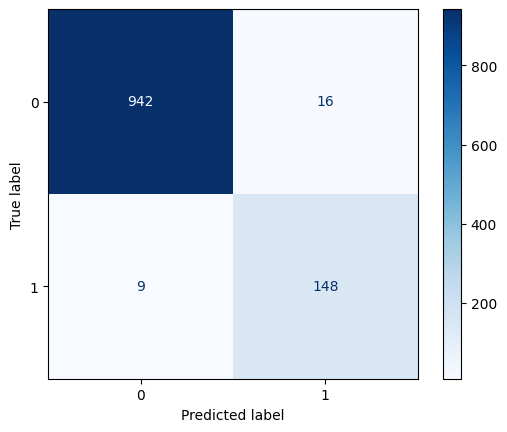

In [14]:
cls = LogisticRegression()
cls.fit(Trainvecs, Trainclss)
cv_score = cross_val_score(cls, Trainvecs, Trainclss, scoring="f1", cv=10)
print(cv_score.mean())
pred_train = cls.predict(Trainvecs)
pred_test = cls.predict(Testvecs)
prec = metrics.precision_score(Testclss, pred_test)
recal = metrics.recall_score(Testclss, pred_test)
f1_s = metrics.f1_score(Testclss, pred_test)
train_accuracy = cls.score(Trainvecs, Trainclss)
test_accuracy = cls.score(Testvecs, Testclss)
print("Precision: {}, Recall: {}, F1: {}, Train Accuracy: {}, Test Accuracy: {}".format(prec, recal, f1_s, train_accuracy, test_accuracy))
ConfusionMatrixDisplay.from_estimator(cls, Testvecs, Testclss, cmap="Blues")

**Phần thực hành:**


1.   Thay đổi các tham số khi huấn luyện WordVector cho tiếng Việt và tiếng Anh.
2.   Sử dụng mỗi phiên bản WordVector cho các tác vụ: Cặp từ đồng nghĩa, Vector hóa văn bản và nhận xét.

Lưu ý: Ngữ liệu do các bạn sưu tầm.

Dữ liệu cặp từ đồng nghĩa như sau

In [19]:
f = open("explicitsim353.csv", "wt")
filecontent = """cs_word_1,cs_word_2,average,
glass,magician,1.575,
glass,metal,3.0,
government,crisis,2.825,
governor,interview,1.8,
governor,office,4.25,
grocery,money,1.97435897436,
holy,sex,1.225,
hospital,infrastructure,4.02564102564,
hotel,reservation,3.79487179487,
hundred,percent,3.52631578947,
image,surface,2.4358974359,
impartiality,interest,2.5,
investigation,effort,3.125,
investor,earning,3.7,
jaguar,car,4.975,
jaguar,cat,5.975,
journal,association,2.1,
journey,car,3.175,
journey,voyage,7.625,
king,cabbage,1.26315789474,
king,queen,5.45,
king,rook,3.325,
lad,brother,3.95,
lad,wizard,2.66666666667,
law,lawyer,5.42424242424,
lawyer,evidence,3.25641025641,
liability,insurance,4.79487179487,
life,death,4.34210526316,
life,lesson,3.23076923077,
life,term,2.75,
line,insurance,1.59459459459,
liquid,water,6.10810810811,
listing,category,4.40540540541,
listing,proximity,2.225,
lobster,food,5.65,
lobster,wine,2.15384615385,
love,sex,5.575,
lover,quarrel,2.41176470588,
luxury,car,3.46153846154,
magician,wizard,6.775,
man,governor,4.175,
man,woman,5.3,
marathon,sprint,5.25,
media,gain,1.65,
media,radio,5.41025641026,
media,trading,1.71794871795,
midday,noon,8.02564102564,
mile,kilometer,6.325,
minister,party,2.225,
ministry,culture,2.28947368421,
minority,peace,1.725,
money,bank,5.15,
money,cash,8.12820512821,
money,cash,8.51282051282,
money,currency,8.0,
money,deposit,4.575,
money,dollar,7.4,
money,laundering,3.2,
money,operation,1.925,
money,possession,3.71794871795,
money,property,4.05263157895,
money,wealth,6.26315789474,
money,withdrawal,3.62162162162,
monk,oracle,2.72972972973,
monk,slave,2.325,
month,hotel,1.33333333333,
morality,importance,2.71052631579,
morality,marriage,2.7,
movie,critic,3.25,
movie,popcorn,3.625,
movie,star,3.425,
movie,theater,5.51351351351,
murder,manslaughter,6.79487179487,
museum,theater,4.075,
music,project,2.8,
nature,environment,7.3,
nature,man,2.9,
network,hardware,3.82051282051,
news,report,5.82051282051,
noon,string,1.25641025641,
observation,architecture,1.75,
oil,stock,2.87179487179,
opera,industry,1.6,
opera,performance,4.75,
peace,atmosphere,2.33333333333,
peace,insurance,1.6,
peace,plan,2.05,
phone,equipment,3.87179487179,
physics,chemistry,5.25,
physics,proton,4.5,
plane,car,3.97435897436,
planet,astronomer,4.12820512821,
planet,constellation,4.30769230769,
planet,galaxy,5.6,
planet,moon,5.825,
planet,people,2.45,
planet,space,5.05,
planet,star,5.025,
planet,sun,5.425,
population,development,2.81578947368,
possibility,girl,1.425,
practice,institution,2.625,
precedent,antecedent,4.6,
precedent,cognition,1.86842105263,
precedent,collection,1.75,
precedent,example,4.0,
precedent,group,1.725,
precedent,information,2.925,
precedent,law,3.85,
prejudice,recognition,1.9,
preservation,world,2.375,
president,medal,1.7,
problem,airport,1.64102564103,
problem,challenge,6.28205128205,
production,crew,3.65789473684,
production,hike,1.64102564103,
professor,cucumber,1.0,
professor,doctor,4.84615384615,
profit,loss,3.97435897436,
profit,warning,1.95,
psychology,Freud,4.38461538462,
psychology,anxiety,3.5641025641,
psychology,clinic,3.28947368421,
psychology,cognition,3.45,
psychology,depression,3.76923076923,
psychology,discipline,3.35,
psychology,doctor,3.85,
psychology,fear,3.175,
psychology,health,4.15,
psychology,mind,4.89189189189,
psychology,psychiatry,5.91428571429,
psychology,science,5.18421052632,
reason,criterion,4.675,
reason,hypertension,1.33333333333,
record,number,3.825,
registration,arrangement,2.5,
report,gain,2.13157894737,
rock,jazz,4.85,
rooster,voyage,1.45,
school,center,2.875,
seafood,food,6.41025641026,
seafood,lobster,6.6,
seafood,sea,4.025,
secretary,senate,2.675,
seven,series,2.025,
shore,woodland,2.7,
shower,flood,3.625,
shower,thunderstorm,4.0,
sign,recess,1.85,
situation,conclusion,2.92307692308,
situation,isolation,1.95,
size,prominence,3.28205128205,
skin,eye,2.925,
smart,student,3.675,
smart,stupid,4.15384615385,
soap,opera,3.20512820513,
space,chemistry,2.675,
space,world,5.16216216216,
start,match,2.05,
start,year,1.6,
stock,CD,2.73684210526,
stock,egg,1.5641025641,
stock,jaguar,1.4358974359,
stock,life,2.125,
stock,live,2.3,
stock,market,4.52631578947,
stock,phone,1.78947368421,
street,avenue,7.28205128205,
street,block,5.8,
street,children,1.55,
street,place,4.11764705882,
stroke,hospital,3.4358974359,
student,professor,3.925,
sugar,approach,1.12820512821,
summer,drought,3.4,
summer,nature,3.425,
telephone,communication,5.02564102564,
television,film,5.55,
television,radio,4.675,
tennis,racket,4.05263157895,
territory,kilometer,2.1,
territory,surface,3.475,
theater,history,2.07894736842,
tiger,animal,6.9,
tiger,carnivore,6.05,
tiger,cat,6.325,
tiger,fauna,3.89189189189,
tiger,feline,5.8,
tiger,jaguar,5.6,
tiger,mammal,6.05,
tiger,organism,3.45,
tiger,tiger,9.375,
tiger,zoo,3.9,
tool,implement,3.725,
train,car,4.4,
travel,activity,3.475,
treatment,recovery,5.0,
type,kind,6.625,
victim,emergency,3.38461538462,
video,archive,3.425,
viewer,serial,1.61538461538,
vodka,brandy,5.41025641026,
vodka,gin,5.58974358974,
volunteer,motto,1.7,
war,troops,5.0,
water,seepage,3.45,
weapon,secret,2.37837837838,
weather,forecast,5.275,
wood,forest,6.71052631579,
word,similarity,2.025,"""
f.write(filecontent)

5208

In [21]:
dataset = pd.read_csv("explicitsim353.csv", encoding="windows-1252")
word1 = list(dataset["cs_word_1"])
word2 = list(dataset["cs_word_2"])
sim = list(dataset["average"])
print(word1[0], word2[0], sim[0])

glass magician 1.575


Đánh giá theo độ đo Spearman, Pearson

In [3]:
from scipy import stats
X = [1, 2, 3, 4, 5]
Y = [1, 2, 3, 5, 4]

# r = 1 - sum(d*d)/(n*(n+1)*(n-1))
r = stats.spearmanr(X, Y)
print(r.statistic)

# r = 1 - sum(dx*dy)/sqrt(sum(dx*dx)*sum(dy*dy))
r = stats.pearsonr(X, Y)
print(r.statistic)

0.8999999999999998
0.8999999999999999
